In [4]:
%pip install seaborn matplotlib

In [5]:
import pandas as pd 
import numpy as np 
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data helthcare.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 32.0+ KB


In [8]:
df.drop_duplicates(inplace = True) 
df.reset_index(drop = True, inplace = True)

In [9]:
df.describe()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
# Categorical variables
print("Categorical variables:")
print(df.select_dtypes(include=['object']).columns)

Categorical variables:
Index(['sex'], dtype='object')


Text(0.5, 1.0, 'Occurrence of CVD across Age')

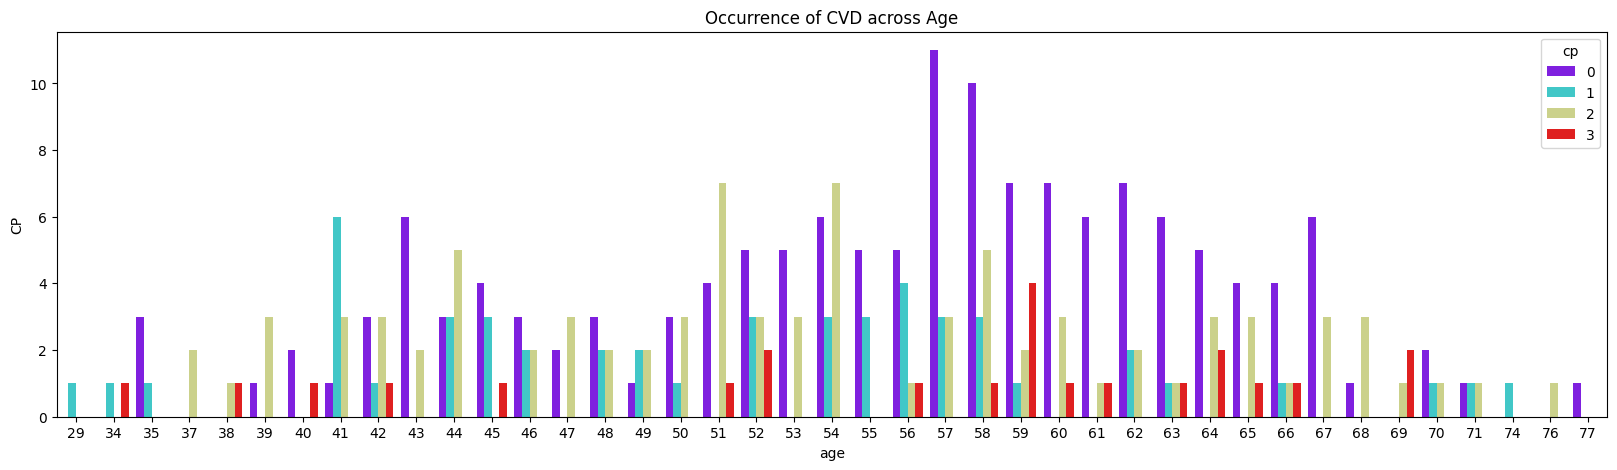

In [12]:
# Study the occurrence of CVD across Age.
plt.figure(figsize=(20, 5))
sns.countplot(x='age', data=df, hue="cp", palette='rainbow', legend=True)
plt.xlabel('age')
plt.ylabel('CP')
plt.title('Occurrence of CVD across Age')

   cp     sex  patients
0   0  Female        39
1   0    Male       104
2   1  Female        18
3   1    Male        32
4   2  Female        35
Index(['cp', 'sex', 'patients'], dtype='object')


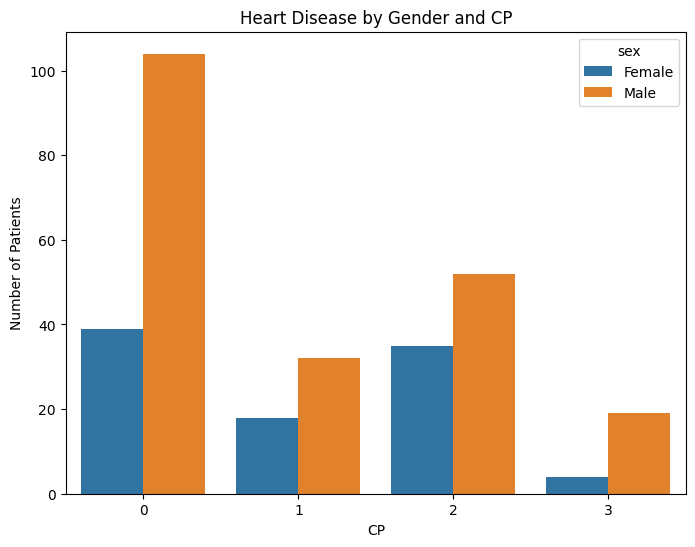

In [6]:
# Study the composition of overall patients w.r.t. Gender
sex_mapping = {0: 'Female', 1: 'Male'}
df['sex'] = df['sex'].map(sex_mapping)

grouped_df = df.groupby(['cp', 'sex']).size().reset_index(name='patients')


print(grouped_df.head())
print(grouped_df.columns)


plt.figure(figsize=(8, 6))
sns.barplot(x='cp', y='patients', hue='sex', data=grouped_df)
plt.xlabel('CP')
plt.ylabel('Number of Patients')
plt.title('Heart Disease by Gender and CP')
plt.show()

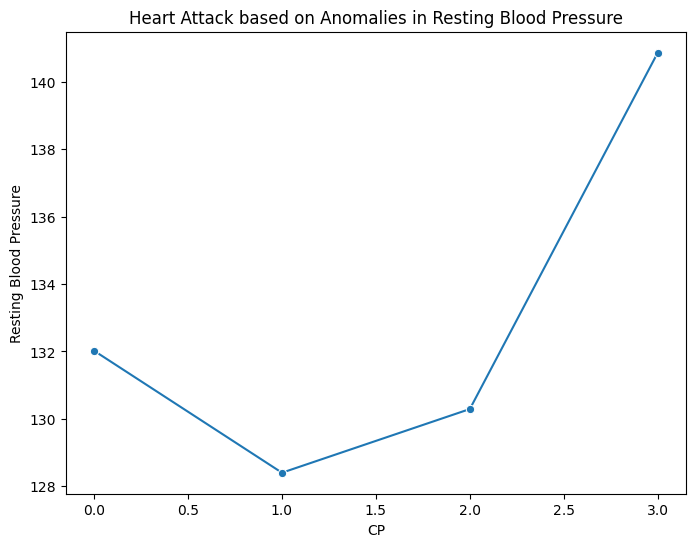

In [21]:
# Detecting heart attack based on anomalies in Resting Blood Pressure
grouped_df = df.groupby('cp').mean(numeric_only=True).reset_index()
plt.figure(figsize=(8, 6))
sns.lineplot(x='cp', y='trestbps', data=grouped_df, marker='o')
plt.xlabel('CP')
plt.ylabel('Resting Blood Pressure')
plt.title('Heart Attack based on Anomalies in Resting Blood Pressure')
plt.show()

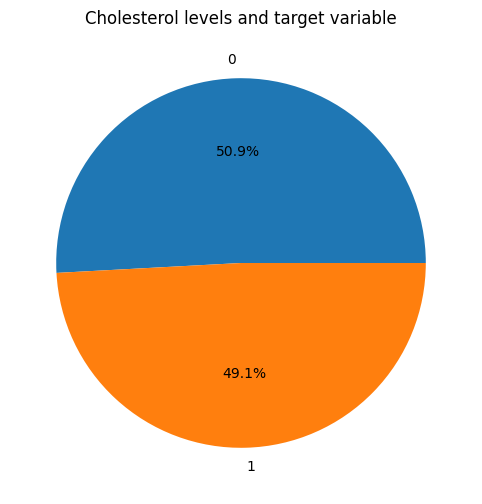

In [22]:
# Relationship between Cholesterol levels and target variable (CVD)
grouped_df = df.groupby('target').mean(numeric_only=True).reset_index()
plt.figure(figsize=(8, 6))
plt.pie(grouped_df['chol'], labels=grouped_df['target'], autopct='%1.1f%%')
plt.title('Cholesterol levels and target variable')
plt.show()

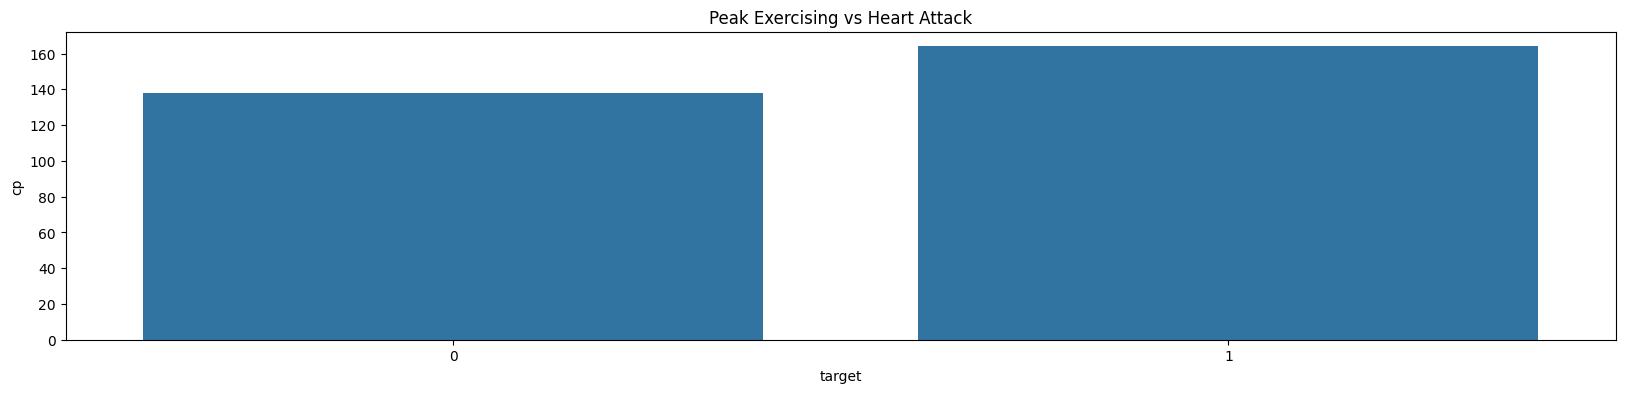

In [15]:
# Relationship between peak exercising and occurrence of heart attack
plt.figure(figsize=(20, 4))
sns.countplot(x='target', data=df)
plt.xlabel('target')
plt.ylabel('cp')
plt.title('Peak Exercising vs Heart Attack')
plt.show()

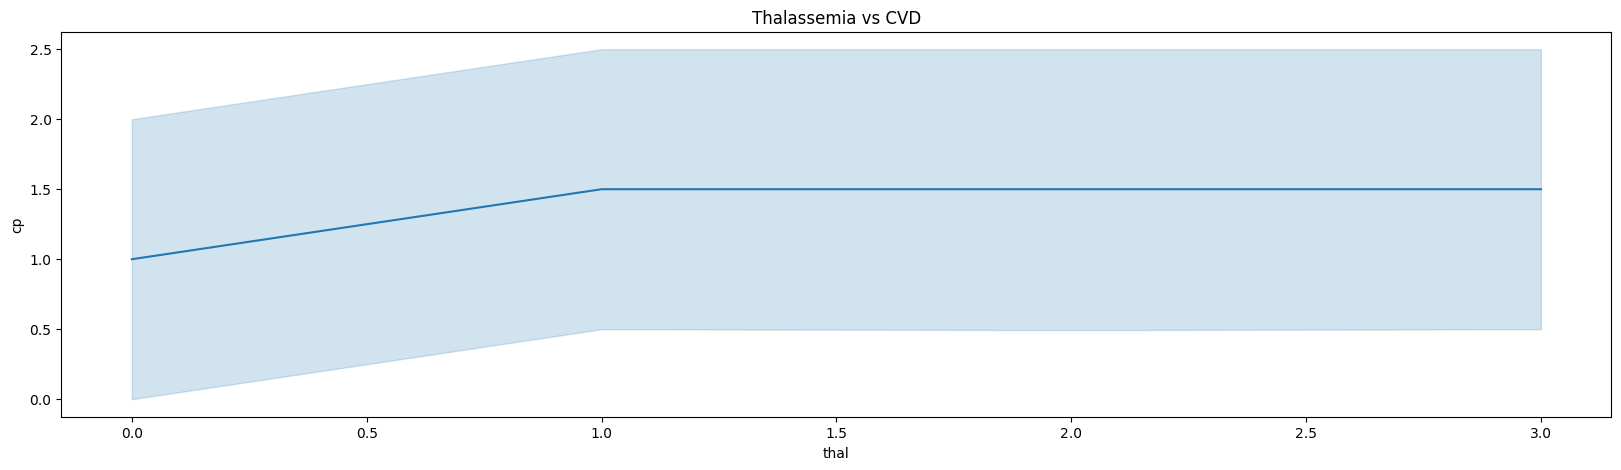

In [16]:
# Thalassemia as a cause of CVD
plt.figure(figsize=(20, 5))
sns.lineplot(x='thal', y='cp', data=df.value_counts(['thal', 'cp']).reset_index())
plt.title('Thalassemia vs CVD')
plt.show()

<Figure size 2000x500 with 0 Axes>

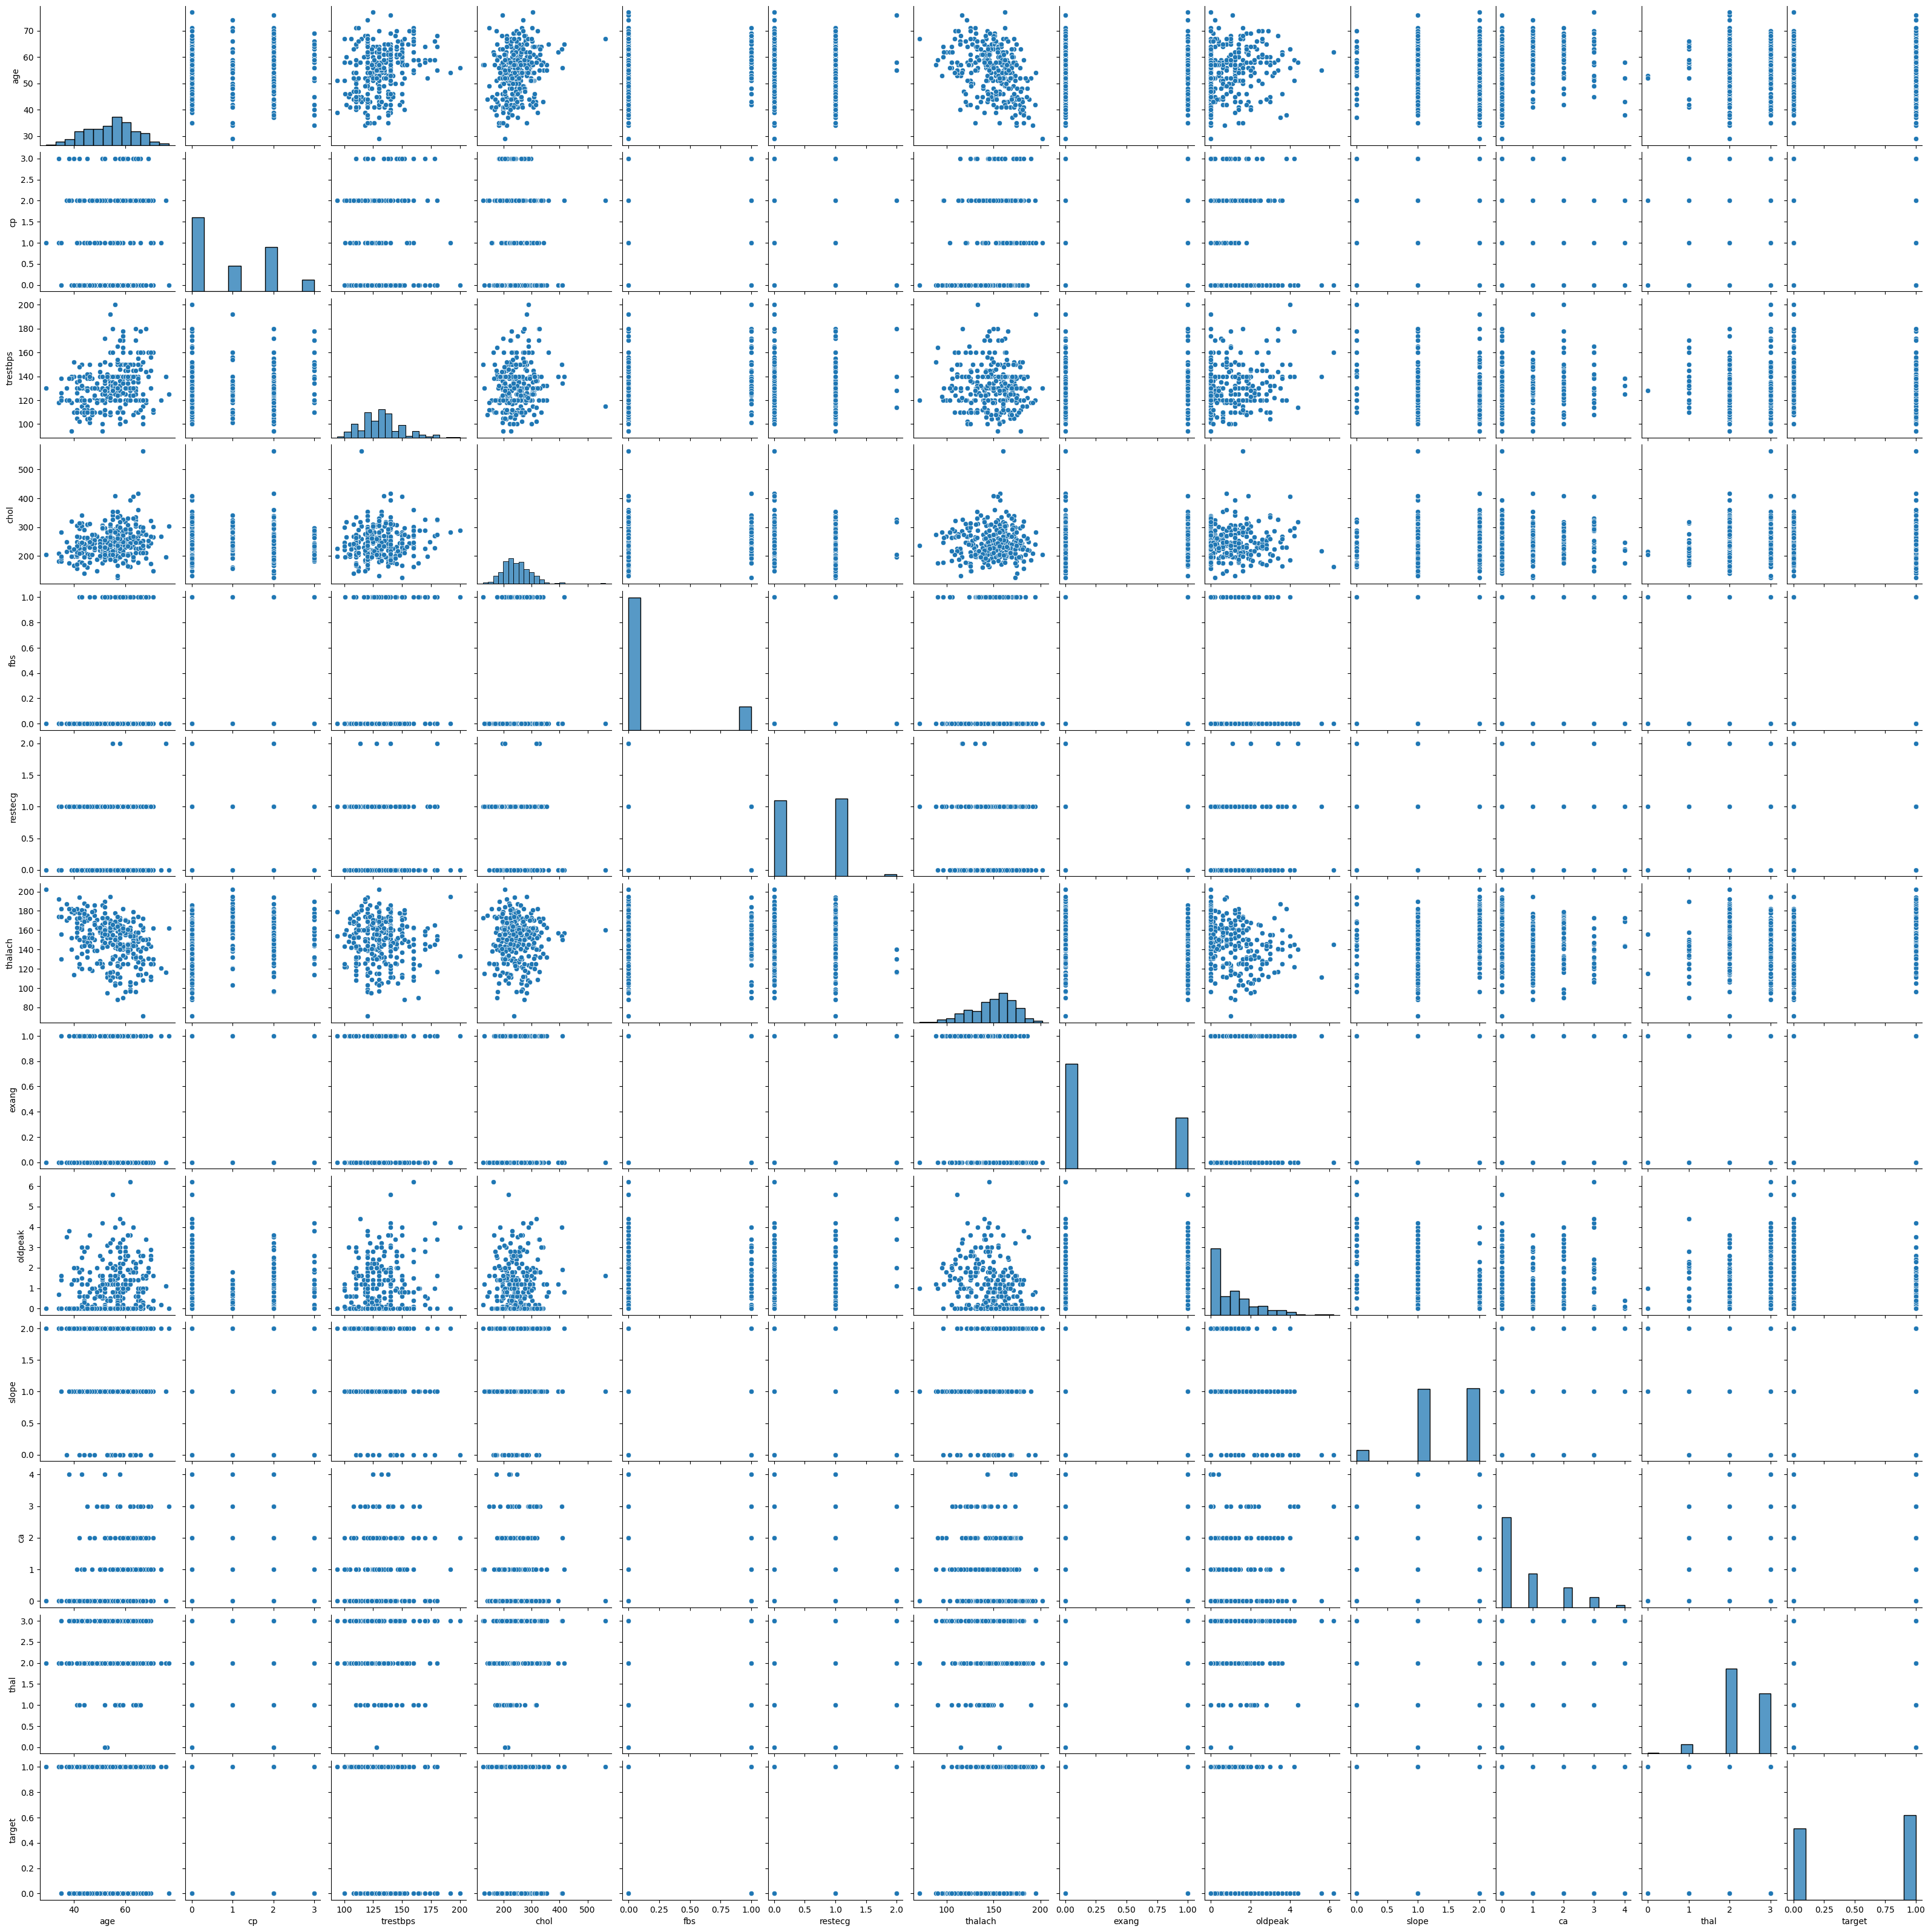

In [17]:
# Pair plot to understand the relationship between all variables
plt.figure(figsize=(20, 5))
sns.pairplot(df)
plt.show()

<ipython-input-18-fb5bc34ddff9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<AxesSubplot:>

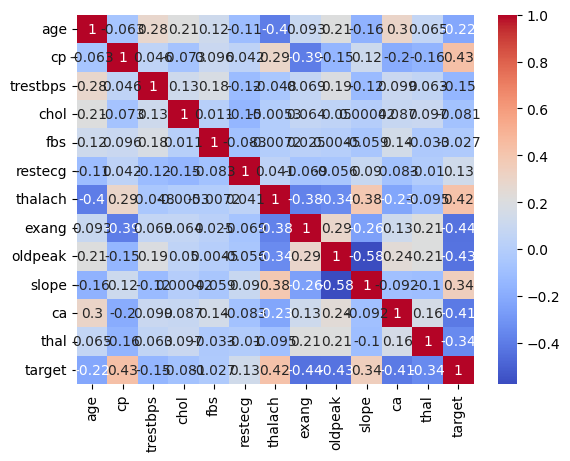

In [18]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')